# The Chronic Disease: Diabetes

Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy.

The body breaks down most of the food we eat into sugar (glucose) and releases it into your bloodstream. When the blood sugar goes up, it signals the pancreas to release insulin. Insulin acts like a key to let the blood sugar into body’s cells for use as energy.

With diabetes, body doesn’t make enough insulin or can’t use it as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in the bloodstream. 

**Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.**

There isn’t a cure yet for diabetes, but losing weight, eating healthy food, and being active can really help. Other things we can do to help:

* Take medicine as prescribed.
* Get diabetes self-management education and support.
* Make and keep health care appointments.

So, here we will look into a diabetes dataset to understand which factors in our body increases the cases of diabetes in patients.

In [22]:
# Import modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Creating dataframe
diabetes_df = pd.read_csv("diabetes_clean.csv")
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### After importing the dataset we can see there are various factors like pregnancies, glucose, diastolic, triceps, insulin, bmi, dpf, age which can predict whether the patient has diabetes or not.

# 1. Linear Regression model with single feature

In this linear regression model we will create feature and target considering only a single factor Body Mass Index (bmi) as feature and Glucose Level (mg/dL) as target.

We will check how the glucose level changes with bmi of patients.

|    Result             |      A1C Test       | Fasting Blood Sugar Test | Glucose Tolerance Test | Random Blood Sugar Test |
| :-------------------- | :-----------------: | :----------------------: | :--------------------: | ----------------------: | 
|     **Diabetes**      |   6.5% or above     | 126mg/dL or above        | 200mg/dL or above      |    200mg/dL or above    |
|     **Prediabetes**   |   5.7% - 6.4%       | 100-125 mg/dL            | 140-199 mg/dL          |          N/A            |
|     **Normal**        |   Below 5.7%        | 99mg/dL or below         | 140mg/dL or below      |          N/A            |

                                    Table 1- Diabetes Results (Source: American Diabetes Association)

In [24]:
# Splitting the data
# Features
X = diabetes_df.drop('glucose', axis = 1).values

# Targets
y = diabetes_df['glucose'].values

# Reshape X
X_bmi = X[:, 4]
X_bmi = X_bmi.reshape(-1,1)

print(X_bmi.shape, y.shape)

(768, 1) (768,)


### (a) Plotting relation between Body Mass Index V/S Glucose Level (mg/dL)

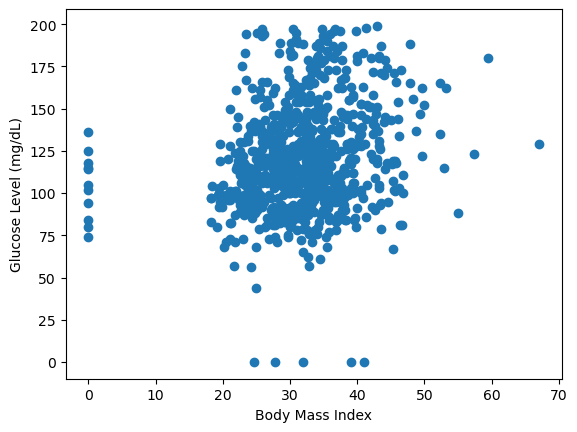

In [25]:
plt.scatter(X_bmi, y)
plt.xlabel("Body Mass Index")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

This plot shows how Glucose Level(mg/dL) of patients change according to the Body Mass Index (BMI).

From the plot we can infer that, the observations having Body Mass Index (bmi) level of 20-50 fall under Glucose Level (mg/dL) of 75-175 mg/dL.

In this Glucose Level (mg/dL) range we can analyze that:
* Patients can be either Normal or Prediabetic or Diabetic. 
* The dataset provided also not specific if the glucose data collected are from fasting blood sugar test or glucose test or random blood sugar test. 
* So the observations can be called vague due to data insufficiency.

### (b) Fitting Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
prediction = reg.predict(X_bmi)
print(prediction[:10])

[122.33559947 116.06003628 113.10155649 117.40479982 130.85243523
 115.16352725 120.004676   123.85966482 119.55642149  92.21289616]


## Predictions for first 10 bmi report.

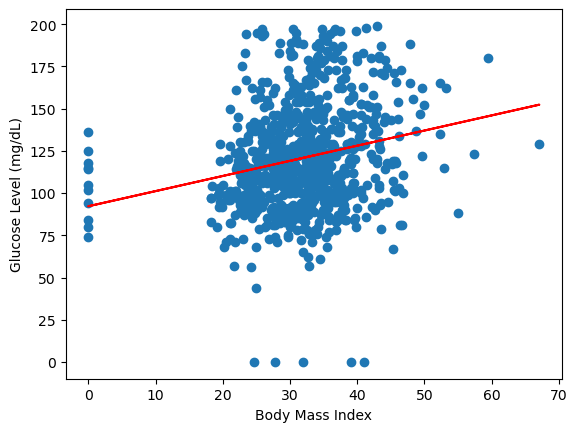

In [27]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, prediction, color= "red")
plt.xlabel("Body Mass Index")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

### From the plot we can infer that, it is a good linear regression model.

Linear regression models comes with linear equation.

y= ax + b

Where, y = target (glucose level)

       x = feature (bmi)
       a, b = coefficients of model (slope and intercept)
       
* Here, the predicted linear regression model touches most of the observation points. But it needs more to be close to the points to minimize the residuals.
* Minimizing the residuals will help in reducing the loss function in the model.
* In the plot, there are a lot of points where each positive residuals will cancel out with each other and this will lead to model disturbance.

To avoid the model to go through the disturbance, we need to perform **Ordinary Least Squares (OLS) Liner Regression model to calculate Residual Sum of Squares (RSS)**.

Simple linear regression models the relationship between the magnitude of one variable and that of a second—for example, as X increases, Y also increases. Or as X increases, Y decreases.1 Correlation is another way to measure how two variables are related: see the section “Correlation”. The difference is that while correlation measures the strength of an association between two variables, regression quantifies the nature of the relationship.


# 2. Linear Regression with all features

#### Here we will consider all the factors deciding the diabetes in patients as features and making target as the Glucose level (mg/dL).

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:5], y_test[:5]))

Predictions: [119.91303675  95.70325357 104.63962314 114.05040231 118.58321727], Actual Values: [ 98 112 108 107 136]


Text(0, 0.5, 'Predicted values')

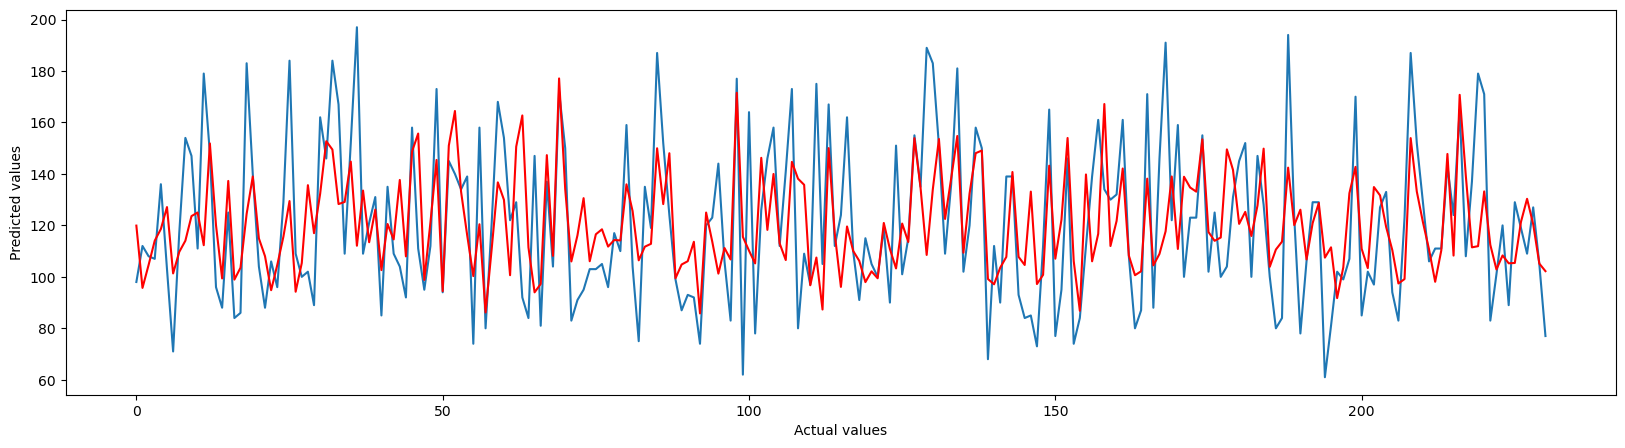

In [29]:
plt.figure(figsize = (20,5))
plt.plot(y_test)
plt.plot(y_pred, color = "red")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

**From the above plot we can analyze that, the bservations are overfitting.**

In [30]:
# Compute R-squared
reg_all.score(X_test, y_test)

0.28280468810375137

**Here, the blood glucose level represents 29.974% variance**

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)

26.34145958223226

**The model has an average error for glucose level of 26.34 mg/dL**

### The generated R-squared is not the representative of the model's ability handle unseen data.

# 3. Cross validation

### For further training of data, cross validation is done so that it can handle unseen data which would be fed later into the model.

In [32]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

cv_results = cross_val_score(reg_all, X, y, cv = kf)
print("Cross validation results: ", cv_results)

Cross validation results:  [0.25587924 0.34566729 0.25314142 0.40478511 0.342931   0.23500624
 0.43466059 0.34516033 0.26297601 0.31405858]


From the above results, we can see how the R-squared value ranges from 0.23 to 0.43.

In [33]:
print("Mean: ", np.mean(cv_results), '\n' "Median: ", np.median(cv_results), '\n' "95% confidence interval: ", np.quantile(cv_results, [0.025, 0.975]))

Mean:  0.3194265804025519 
Median:  0.3284947932670709 
95% confidence interval:  [0.23908666 0.4279386 ]


# Regularized Regression

### As in the above plot we have seen, the predicted plot showed signs of overplotting, so to avoid that we will set regularized regression model here.

In [34]:
from sklearn.linear_model import Ridge
scores =[]
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha= alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)
    

[0.28284666232222233, 0.28320633574804777, 0.2853000732200006, 0.26423984812668133, 0.19292424694100951]


# Lasso Regression

### Here, we will perform lasso regression to check feature importance.

##### In this case, we will check which feature is more important for the target label Glucose level (mg/dL) for the rise and fall of glucose. 

In [35]:
from sklearn.linear_model import Lasso
scores_lasso =[]
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha= alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores_lasso.append(lasso.score(X_test, y_test))
print(scores_lasso)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273882, 0.18127361610181125, 0.15679544303617965]


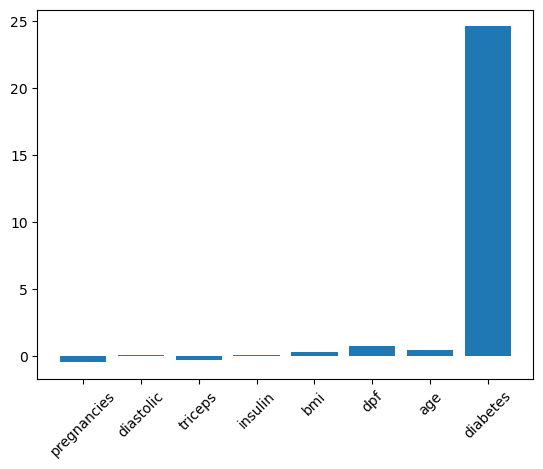

In [36]:
names = diabetes_df.drop("glucose", axis = 1).columns
lasso = Lasso(alpha = 0.1)
lasso_coef= lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation = 45)
plt.show()

### **From the above plot we can analyze that, rise and fall of glucose level in human body decides whether the body is diabetic or not.**